# Task_2: Prediction using Unsupervised ML

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Columns `['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']` as features

In [4]:
x = df.iloc[:, 1:5].values

## Using the elbow method to find out the optimal number of #clusters. 

### KMeans class from the sklearn library.

In [5]:
from sklearn.cluster import KMeans
wcss=[]

### This loop will fit the k-means algorithm to our data and second we will compute the within cluster sum of squares and #appended to our wcss list.

In [6]:
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  n_init=10, random_state=0 )

    # i above is between 1-10 numbers. init parameter is the random initialization method  
    # we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
    # find the final clusters when the K-meands algorithm is running. we enter the default value of 300
    # the next parameter is n_init which is the number of times the K_means algorithm will be run with
    # different initial centroid.
    kmeans.fit(x)

    # kmeans algorithm fits to the X dataset
    wcss.append(kmeans.inertia_)

## Plot the elbow graph

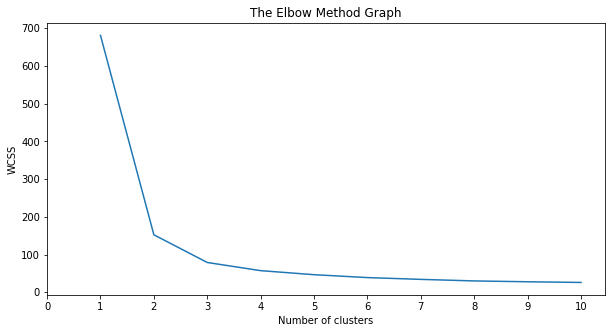

In [7]:
# kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(0,11))
plt.show()

## Applying k-means algorithm

In [8]:
# According to the Elbow graph we deterrmine the clusters number as 
# Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0)

# We are going to use the fit predict method that returns for each 
# observation which cluster it belongs to. The cluster to which 
# client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(x)

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Visualizing the clusters

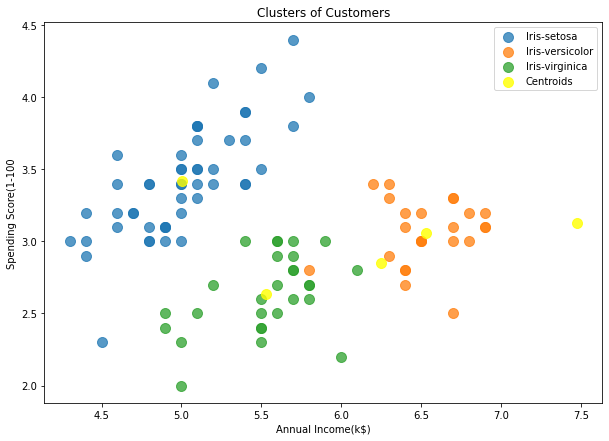

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, alpha=0.75, label ='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, alpha=0.75, label ='Iris-versicolor')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, alpha=0.75, label ='Iris-virginica')

# Plot the centroid. This time we're going to use the cluster centres  
# attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='yellow', s=100, alpha=0.8, label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend();